In [46]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import pingouin as pg
import numpy as np
from statsmodels.multivariate.manova import MANOVA
import os
import pathlib

sheet_url = 'https://docs.google.com/spreadsheets/d/1HErg80MdLUa5fg2S3Cs9DIgVTdGTjwulnD6KoJrjcjE/edit?usp=sharing'
sheet_name = 'T3'

sheet_id = (
    sheet_url
    .replace('/d/', '*')
    .replace('/edit', '*')
    .split('*')
)

url = f'https://docs.google.com/spreadsheets/d/{sheet_id[1]}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

raw_data = pd.read_csv(url)

raw_data


,Tx,TH,11DIV,18DIV,21DIV
0,Iron-Sufficient,T3,0.8350,1.0490,1.1155
1,Iron-Sufficient,T3,0.9380,1.0680,1.0460
2,Iron-Sufficient,T3,0.9140,1.1465,1.1045
3,Iron-Sufficient,T3,1.1830,1.2185,1.0945
4,Iron-Sufficient,T3,1.0945,0.9745,0.9635
5,Iron-Sufficient,T3,1.0775,1.1505,0.8725
6,Iron-Deficient,T3,1.0135,1.1615,1.1415
7,Iron-Deficient,T3,1.0465,1.1915,1.1175
8,Iron-Deficient,T3,1.0945,1.0485,1.1295
9,Iron-Deficient,T3,1.2555,1.2385,1.0425


In [47]:
raw_data = raw_data.replace(
    {'Iron-Sufficient': 'FeS', 'Iron-Deficient': 'FeD'})
data = (raw_data
        .melt(id_vars=['Tx', 'TH'],
              var_name='DIV',
              value_name='Abs')
        )

data.head()


,Tx,TH,DIV,Abs
0,FeS,T3,11DIV,0.8350
1,FeS,T3,11DIV,0.9380
2,FeS,T3,11DIV,0.9140
3,FeS,T3,11DIV,1.1830
4,FeS,T3,11DIV,1.0945


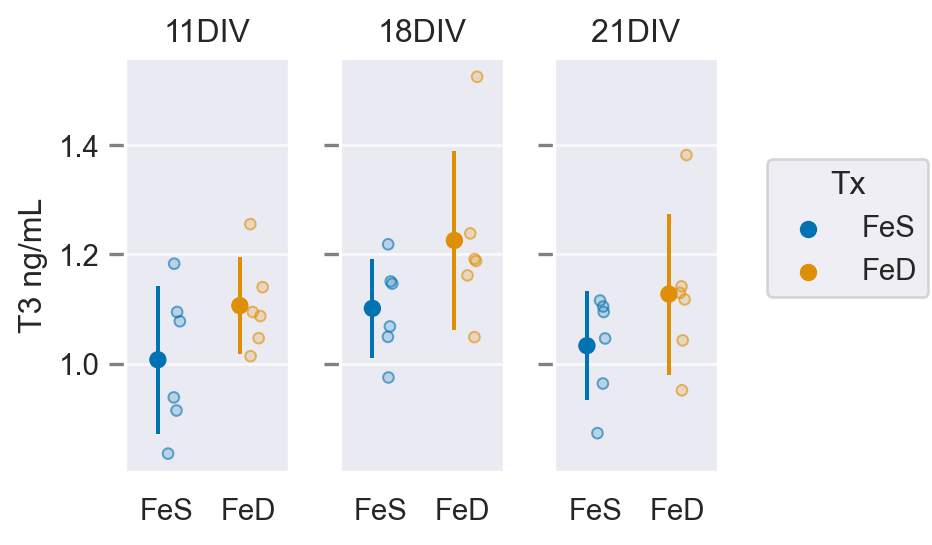

In [50]:
folder_name = 'TH_plots'
fname = 'T3-all.svg'

if not os.path.exists(folder_name):
    os.mkdir(folder_name)
save_loc = pathlib.Path(folder_name + '/' + fname)

(
    so.Plot(
        data=data,
        x='Tx',
        y='Abs',
        color='Tx',
    )
    .facet('DIV')
    .share(x=False, y=True)
    .add(so.Dots(alpha=0.6), so.Jitter(0.2), so.Shift(x=0.1))
    .add(so.Dot(), so.Agg(), so.Shift(x=-0.1))
    .add(so.Range(), so.Est(errorbar='sd'), so.Shift(x=-0.1))
    .layout(size=(4, 3))
    .scale(color='colorblind')
    .label(
        x='',
        y='T3 ng/mL'
    )
    .theme({
        'ytick.left': True,
        'ytick.color': '.5',
        'ytick.labelcolor': '.15',
        'axes.grid': True,
        'grid.alpha': 0.8,
    })
    .save(loc=save_loc, bbox_inches='tight')
)


# Stats

In [39]:
pg.homoscedasticity(data=data,
                    dv='Abs',
                    group='DIV')


,W,pval,equal_var
levene,0.012451,0.987631,True


In [40]:
pg.homoscedasticity(data=data,
                    dv='Abs',
                    group='Tx')


,W,pval,equal_var
levene,0.109852,0.742347,True


In [37]:
pg.anova(data=data,
         dv='Abs',
         between=['DIV', 'Tx'])


,Source,SS,DF,MS,F,p-unc,np2
0,DIV,0.075597,2,0.037798,2.583754,0.092192,0.146940
1,Tx,0.101230,1,0.101230,6.919699,0.013326,0.187426
2,DIV * Tx,0.001549,2,0.000774,0.052928,0.948537,0.003516
3,Residual,0.438878,30,0.014629,NaN,NaN,NaN


In [42]:
pg.pairwise_tests(data=data,
                  dv='Abs',
                  between=['DIV', 'Tx'],
                  padjust='bonf')


c:\Users\timmo\mambaforge\envs\bastian-lab\lib\site-packages\pingouin\pairwise.py:583: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  stats.loc[:, "Parametric"] = parametric


,Contrast,DIV,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,DIV,-,11DIV,18DIV,False,True,-2.031098,22.0,two-sided,0.054501,0.163502,bonf,1.562,-0.800599
1,DIV,-,11DIV,21DIV,False,True,-0.469922,22.0,two-sided,0.643035,1.000000,bonf,0.405,-0.185230
2,DIV,-,18DIV,21DIV,False,True,1.534169,22.0,two-sided,0.139245,0.417734,bonf,0.862,0.604725
3,Tx,-,FeD,FeS,False,True,2.582615,34.0,two-sided,0.014283,NaN,NaN,3.829,0.841741
4,DIV * Tx,11DIV,FeD,FeS,False,True,1.550664,10.0,two-sided,0.152027,0.456082,bonf,0.954,0.826409
5,DIV * Tx,18DIV,FeD,FeS,False,True,1.671174,10.0,two-sided,0.125639,0.376918,bonf,1.059,0.890633
6,DIV * Tx,21DIV,FeD,FeS,False,True,1.338024,10.0,two-sided,0.210518,0.631555,bonf,0.804,0.713085


# Old individual plots below

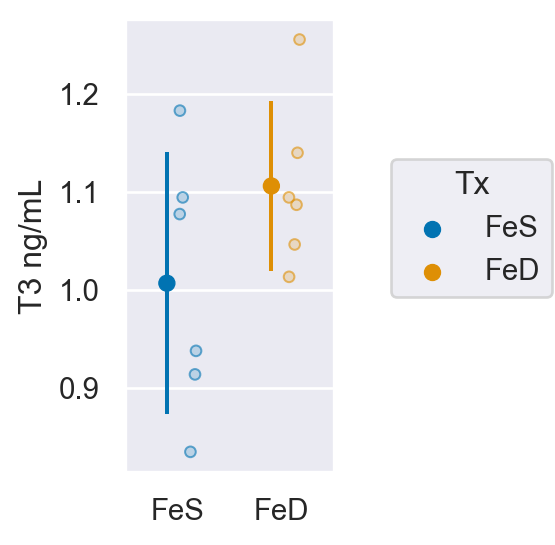

In [11]:
folder_name = 'TH_plots'
fname = 'TH-11DIV.svg'

if not os.path.exists(folder_name):
    os.mkdir(folder_name)
save_loc = pathlib.Path(folder_name + '/' + fname)

(
    so.Plot(
        data=data.loc[data['DIV'] == '11DIV'],
        x='Tx',
        y='Abs',
        color='Tx',
    )
    .share(x=False, y=False)

    .add(so.Dots(alpha=0.6), so.Jitter(0.2), so.Shift(x=0.1))
    .add(so.Dot(), so.Agg(), so.Shift(x=-0.1))
    .add(so.Range(), so.Est(errorbar='sd'), so.Shift(x=-0.1))
    .layout(size=(2, 3))
    .scale(color='colorblind')
    .label(
        x='',
        y='T3 ng/mL'
    )
    .save(loc=save_loc, bbox_inches='tight')
)


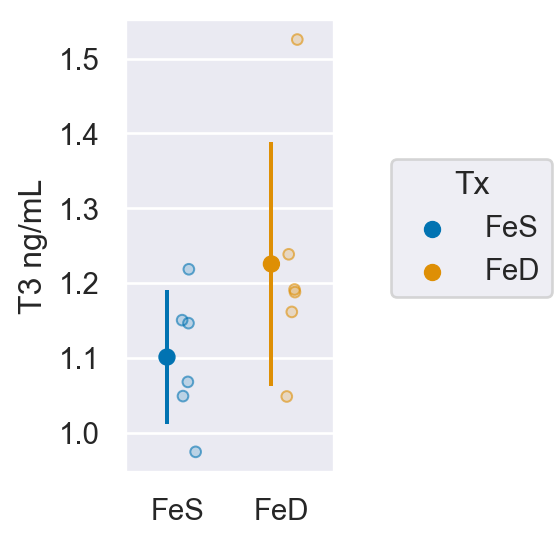

In [12]:
folder_name = 'TH_plots'
fname = 'TH-18DIV.svg'

if not os.path.exists(folder_name):
    os.mkdir(folder_name)
save_loc = pathlib.Path(folder_name + '/' + fname)

(
    so.Plot(
        data=data.loc[data['DIV'] == '18DIV'],
        x='Tx',
        y='Abs',
        color='Tx',
    )
    .share(x=False, y=False)

    .add(so.Dots(alpha=0.6), so.Jitter(0.2), so.Shift(x=0.1))
    .add(so.Dot(), so.Agg(), so.Shift(x=-0.1))
    .add(so.Range(), so.Est(errorbar='sd'), so.Shift(x=-0.1))
    .layout(size=(2, 3))
    .scale(color='colorblind')
    .label(
        x='',
        y='T3 ng/mL'
    )
    .save(loc=save_loc, bbox_inches='tight')
)


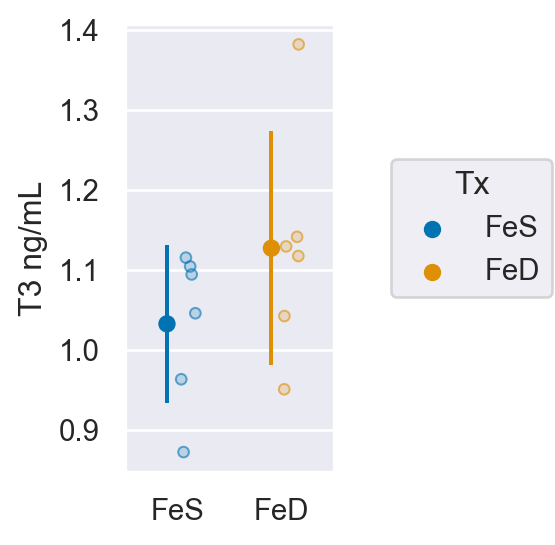

In [14]:
folder_name = 'TH_plots'
fname = 'TH-21DIV.svg'

if not os.path.exists(folder_name):
    os.mkdir(folder_name)
save_loc = pathlib.Path(folder_name + '/' + fname)

(
    so.Plot(
        data=data.loc[data['DIV'] == '21DIV'],
        x='Tx',
        y='Abs',
        color='Tx',
    )
    .share(x=False, y=False)

    .add(so.Dots(alpha=0.6), so.Jitter(0.2), so.Shift(x=0.1))
    .add(so.Dot(), so.Agg(), so.Shift(x=-0.1))
    .add(so.Range(), so.Est(errorbar='sd'), so.Shift(x=-0.1))
    .layout(size=(2, 3))
    .scale(color='colorblind')
    .label(
        x='',
        y='T3 ng/mL'
    )
    .save(loc=save_loc, bbox_inches='tight')
)
